In [10]:
#import packages
from imutils import face_utils
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import dlib
import cv2
import face_recognition

known_face_encodings = []
known_face_names = []

In [11]:
#gpt function
def plt_imshow(title='image', img=None, figsize=(8, 5)):
    plt.figure(figsize=figsize)

    def convert_to_rgb(image):
        if len(image.shape) == 2:
            return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        elif image.shape[2] == 3:
            return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        else:
            return image  # 알 수 없는 포맷일 경우 그대로 반환

    if isinstance(img, list):
        titles = title if isinstance(title, list) else [title] * len(img)

        for i in range(len(img)):
            rgbImg = convert_to_rgb(img[i])
            plt.subplot(1, len(img), i+1)
            plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.axis('off')

        plt.show()
    else:
        rgbImg = convert_to_rgb(img)
        plt.imshow(rgbImg)
        plt.title(title)
        plt.axis('off')
        plt.show()

In [16]:
def name_labeling(input_image):
    image = input_image.copy()
    face_locations = face_recognition.face_locations(image)
    face_encodings = face_recognition.face_encodings(image, face_locations)

    face_names = []

    for face_encoding in face_encodings:
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=0.4)
        name = 'Unknown'
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        
        if matches[best_match_index]:
            name = known_face_names[best_match_index]
        
        face_names.append(name)

    for (top, right, bottom, left), name in zip(face_locations, face_names):
        if name != "unknown":
            color = (0, 255, 0)  # 초록
        else:
            color = (0, 0, 255)  # 빨강

        # 얼굴 테두리 박스
        cv2.rectangle(image, (left, top), (right, bottom), color, 3)

        # ▶ 글자 높이 고려해서 아래쪽이 아니라 위쪽에 표시
        text_y = top - 10 if top - 10 > 10 else top + 20  # 이미지 위로 벗어나지 않게

        # ▶ 배경 박스: 글자가 올라갈 부분
        text_size = cv2.getTextSize(name, cv2.FONT_HERSHEY_DUPLEX, 0.8, 2)[0]
        text_w, text_h = text_size
        cv2.rectangle(image, (left, text_y - text_h - 5), (left + text_w + 10, text_y + 5), color, cv2.FILLED)

        # ▶ 글자 그리기 (글자 위치 조정 포함)
        cv2.putText(image, name, (left + 5, text_y), cv2.FONT_HERSHEY_DUPLEX, 0.8, (0, 0, 0), 2)

    plt_imshow('Output', image, figsize=(24, 15))

In [13]:
def draw_label(input_image, family, label):
    image = input_image.copy()
    (top, right, bottom, left) = family
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 5)
    cv2.putText(image, label, (left-10, top-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)

    return image

def add_known_face(face_image_path, name):
    face_image = cv2.imread(face_image_path)
    face_locations = face_recognition.face_locations(face_image)
    
    if not face_locations:
        print(f"{face_image_path} 얼굴 감지 실패: 건너뜀")
        return

    try:
        face_encoding = face_recognition.face_encodings(face_image, face_locations)[0]
        detected_face_image = draw_label(face_image, face_locations[0], name)

        known_face_encodings.append(face_encoding)
        known_face_names.append(name)
    except Exception as e:
        print(f"{face_image_path} 처리 중 오류 발생: {e}")

In [18]:
#gpt: 딸, 엄마, 할머니 사진 각자 전부 다 학습
import os

def add_all_faces_from_folder(folder_path, name):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # 이미지 파일만 필터
            face_path = os.path.join(folder_path, filename)
            try:
                add_known_face(face_path, name)
            except Exception as e:
                print(f"{face_path} 처리 중 오류 발생: {e}")

#add_all_faces_from_folder('data/F1/D', 'Daughter')
add_all_faces_from_folder('data/F1/M', 'Mother')
#add_all_faces_from_folder('data/F1/GM', 'GrandMother')

data/F1/M\F0001_IND_M_45_-90_01.JPG 얼굴 감지 실패: 건너뜀
data/F1/M\F0001_IND_M_45_-90_02.JPG 얼굴 감지 실패: 건너뜀
data/F1/M\F0001_IND_M_45_-90_03.JPG 얼굴 감지 실패: 건너뜀
data/F1/M\F0001_IND_M_45_-90_04.JPG 얼굴 감지 실패: 건너뜀
data/F1/M\F0001_IND_M_45_-90_CAM.jpg 얼굴 감지 실패: 건너뜀
data/F1/M\F0001_IND_M_45_90_01.JPG 얼굴 감지 실패: 건너뜀
data/F1/M\F0001_IND_M_45_90_02.JPG 얼굴 감지 실패: 건너뜀
data/F1/M\F0001_IND_M_45_90_03.JPG 얼굴 감지 실패: 건너뜀
data/F1/M\F0001_IND_M_45_90_04.JPG 얼굴 감지 실패: 건너뜀


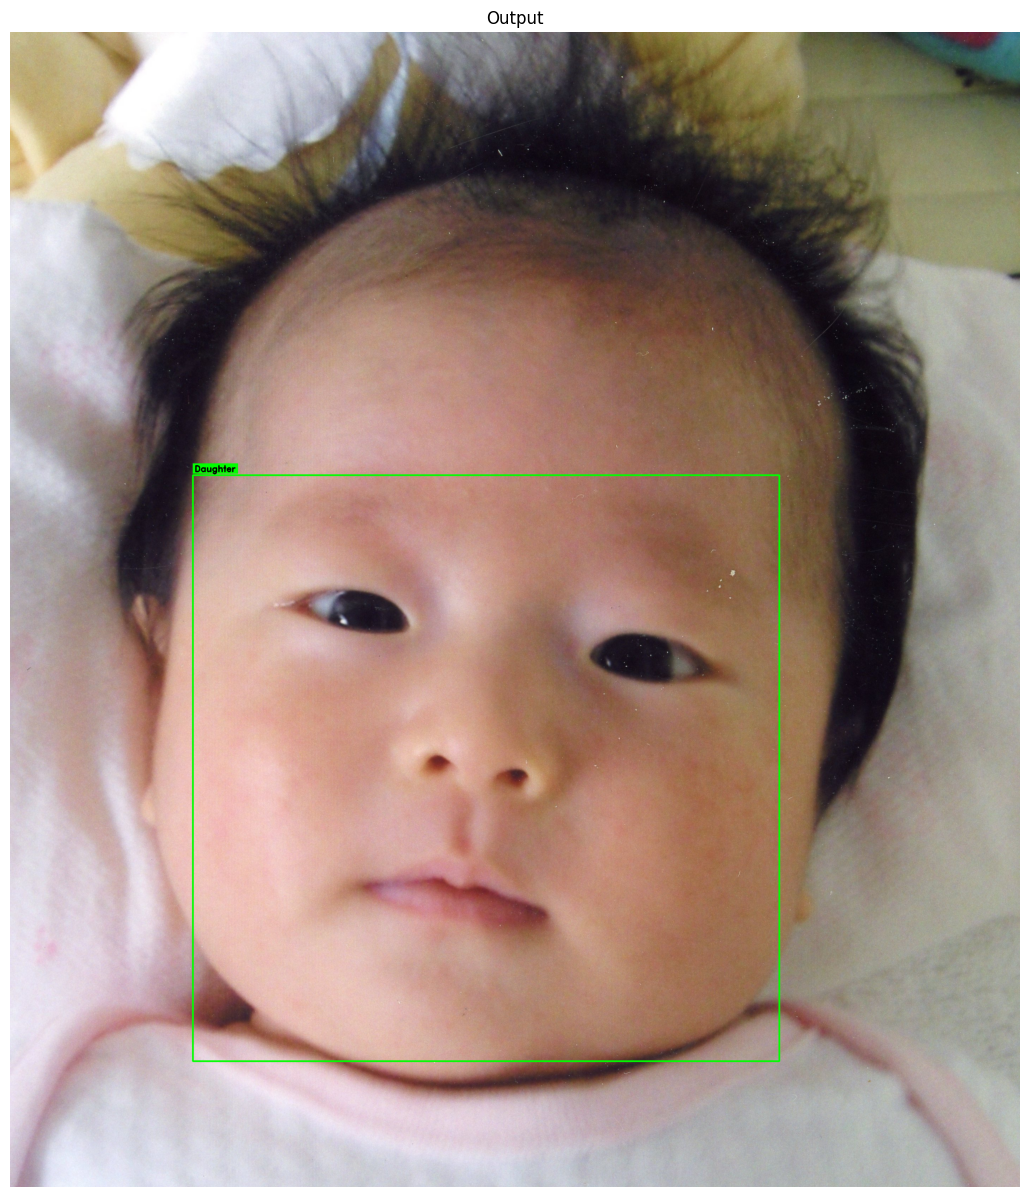

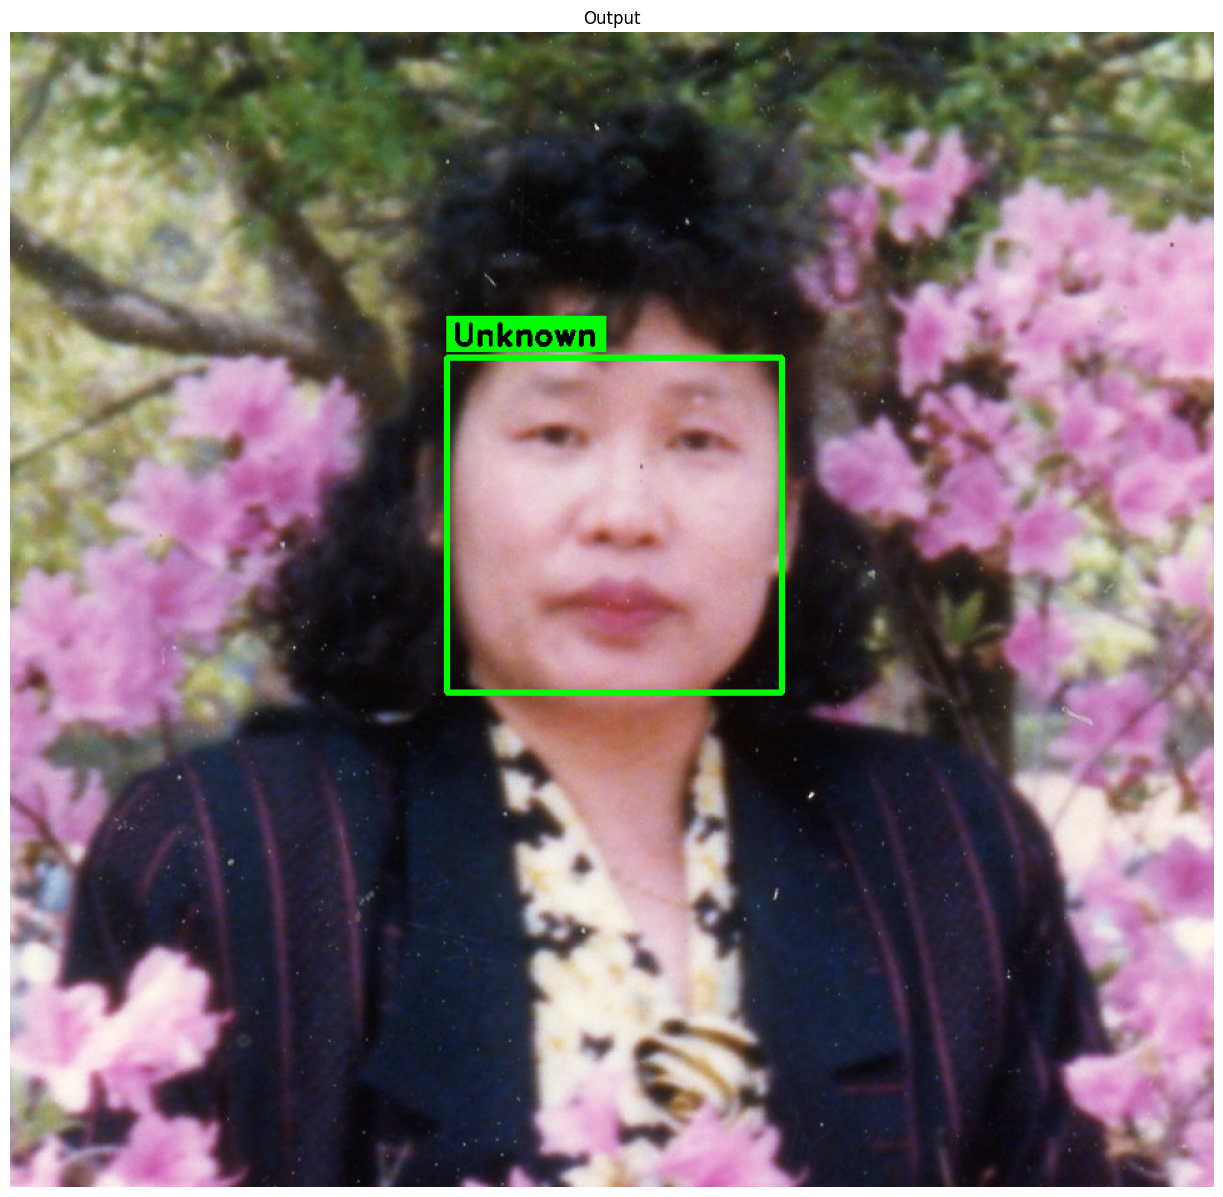

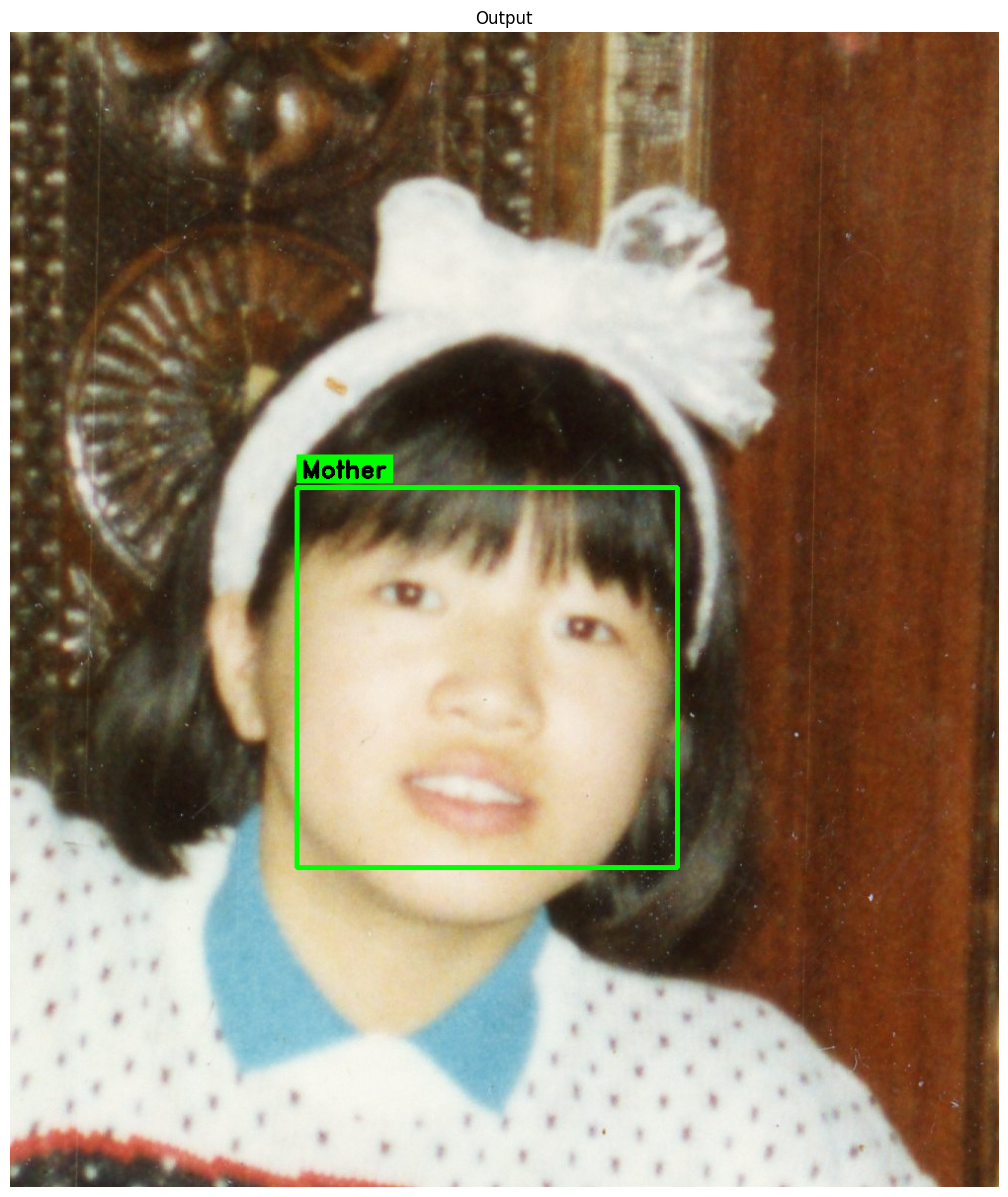

In [19]:
d = 'F0001_AGE_D_18_a1.jpg'
gm = 'F0001_AGE_GM_75_d1.jpg'
m = 'F0001_AGE_M_45_b1.jpg'

test_image1 = cv2.imread(d)
test_image2 = cv2.imread(gm)
test_image3 = cv2.imread(m)

name_labeling(test_image1)
name_labeling(test_image2)
name_labeling(test_image3)